In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import datetime

(35, 2)


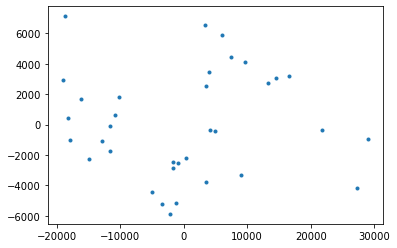

In [18]:
df = pd.read_csv("Output.csv")
data = df.drop('DATE', axis=1).to_numpy()
pca_d = PCA(n_components=2).fit_transform(data)
print(pca_d.shape)
plt.plot(pca_d[:,0],pca_d[:,1], '.')
plt.show()

### HMM Class from HW 12.4

In [ ]:
class hmm(object):
    """
    Finite state space hidden markov model.
    """
    def __init__(self, A, B, pi):
        """
        Initialize model parameters.
        """
        self.A = A
        self.B = B
        self.pi = pi
    
    #Part (i)
    def _forward(self, obs):
        """
        Compute the forward probability matrix.

        Parameters
        ----------
        obs : ndarray of shape (T,)
        The observation sequence

        Returns
        -------
        alpha : ndarray of shape (T,n)
        The forward probability matrix (alpha)
        """
        m,n = self.B.shape
        T = len(obs)
        alpha = np.zeros((T,n))
        #Recursively compute the matrix
        for i in range(T):
            if i == 0:
                alpha[0,:] = self.pi * self.B[obs[0],:]
            else:
                alpha[i,:] = self.B[obs[i],:] * (alpha[i-1,:] @ self.A.T)
        return alpha
        

    def _backward(self, obs):
        """
        Compute the backward probability matrix.
        Parameters
        ----------
        obs : ndarray of shape (T,)
        The observation sequence
        Returns
        -------
        beta : ndarray of shape (T,n)
        The backward probability matrix
        """
        m,n = self.B.shape
        T = len(obs)
        beta = np.zeros((T,n))
        #Initialize last row
        beta[-1,:] = 1
        #Recursively compute the matrix
        for i in range(T-2,-1,-1):
            beta[i,:] = (beta[i+1,:] * self.B[obs[i+1],:]) @ self.A
        return beta
            

    def _gamma(self, alpha, beta):
        """
        Compute the gamma probabilities.

        Parameters
        ----------
        alpha : ndarray of shape (T,n)
        The forward probability matrix from the forward pass
        beta : ndarray of shape (T,n)
        The backward probability matrix from the - backward pass

        Returns
        -------
        gamma : ndarray of shape (T,n)
        The gamma probability array
        """
        T, _ = alpha.shape
        gamma = np.zeros_like(alpha)
        denom = np.sum(alpha[-1,:])
        #Compute gammas
        for i in range(T):
            gamma[i,:] = alpha[i,:] * beta[i,:] / denom
        return gamma
        

    def viterbi(self, obs):
        """
        Compute the most likely state sequence.

        Parameters
        ----------
        obs : ndarray of shape (T,)
        The observation sequence

        Returns
        -------
        y* : ndarray of shape (T,) with entries in 0,1,...,n-1
        The most likely state sequence.
        """
        #Get sizes
        T = len(obs)
        m,n = self.B.shape
        nu = np.zeros((T,n))
        x_hat = np.zeros((T,n))
        #Iteratively find the most likely states
        nu[0,:] = np.log(self.pi)+np.log(self.B[obs[0],:])
        print(np.exp(nu[0,:]))
        for i in range(1,T):
            probs = (nu[i-1,:] + np.log(self.A)).T + np.log(self.B[obs[i],:])
            nu[i,:] = np.max(probs, axis=0)
            x_hat[i-1,:] = np.argmax(probs, axis=0)
            print(np.exp(probs))
        #Find final optimizers
        x_star = np.zeros(T).astype(int)
        x_star[-1] = np.argmax(nu[-1,:])
        for i in range(T-2, -1, -1):
            x_star[i] = x_hat[i, x_star[i+1]]
        return x_star
            